### Leerdoelen
- Je leert wat unsupervised learning inhoud
- Je leert werken met K-means clustering in Python
- Je leert de uitkomst van K-means clustering interpreteren
- Je leert je conslusies uit het Data Understanding te verbinden aan de uitkomst van je K-means analyse
- Je leert het aantal clusters van een K-means te tunen

### Achtergrondinformatie:
- Google naar:
    - `python sklearn kmeans`
    - `seaborn pairplot`
    - `pandas crosstab`
    - `k-means elbow method`
- Datacamp course `Clustering for dataset exploration` 

### Opdracht 
- Vul het onderstaande notebook aan op de gevraagde plekken. 

# Business Understanding
Dieren en planten worden door wetenschappers ingedeeld in verschillende categorien. Dit gebeurt op hoog niveau (neushoorn vs ringstaatmaki) en op detail niveau (zwarte vs witte neushoorn). Een dergelijk indeling wordt ook wel een taxonomie genoemd. Vaak wordt een dergelijke taxonomie gebaseerd op handmatig onderzoek door biologen. In deze analyse gaan we een dergelijke taxonomie toetsen voor een drietal soorten iris: wordt de indeling in verschillende soorten ondersteunt door de data?

# Data Understanding
De iris data is ons aangeleverd in een `csv` bestand:

In [8]:
# importeer je packages
# lees de dataset in
# toon als controle de 1e 5 records

import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Nieuw!

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [5]:
df.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [11]:
df.groupby('Species').describe().transpose()

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

**Vul dit stuk aan: denk aan zaken als wat de variabelen precies zijn, hoeveel samples, etc. Je moet ook een overzicht geven van het gemiddelde en de standaard deviation van elke variabele per soort iris (tip: gebruik groupby). Besteed ook aandacht aan je conclusie: hoe goed kan je de verschillende soort bloemen uit elkaar houden op basis van deze variabelen.**

Om een verdere indruk te krijgen van de verdeling van de data maken we een scatterplotmatrix:

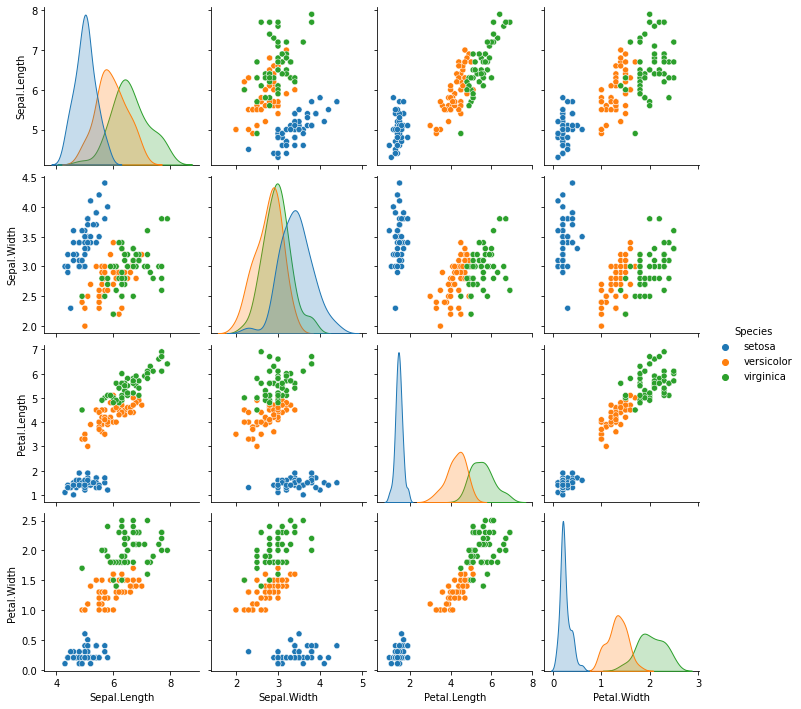

In [12]:
# code voor de scatterplot matrix, gebruik hiervoor seaborn. 
# TIP: geef een kleur aan elk puntje...

sns.pairplot(df, hue='Species')

**Vul dit stuk aan: welke conclusie verbind je aan dit figuur? Welke soorten zijn goed onderscheidbaar? Is dit in lijn met je eerder conclusie op basis van het gemiddelde en de standaard deviatie?**

# Data Preparation
**Vul dit stuk aan: als er zaken uit de Data Understanding komen rollen die aanpassingen van de data vragen**. 


In [15]:
df_zonder_speciesnaam = df.copy()
df_zonder_speciesnaam = df_zonder_speciesnaam.drop(columns=['Species'])
df_zonder_speciesnaam.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Tot nu toe hebben we naar een aantal figuren gekeken in een poging om de verschillende soorten iris uit elkaar te kunnen halen. Nu gaan we een K-means unsupervised learning algoritme gebruiken om dit onderscheid te proberen te maken met een model:

In [19]:
# voer hier een kmeans clustering uit met drie clusters
# let er op dat de Species kolom misschien niet goed samengaat met de kmeans functie uit sklearn

model = KMeans(n_clusters=3)
model = model.fit(df_zonder_speciesnaam)

In [23]:
df_zonder_speciesnaam['cluster'] = model.labels_

In [32]:
# Truukje om te zorgen dat de kleuren echt uniek worden en geen kleurschaal van 0 t/m 2
df_zonder_speciesnaam['cluster'] = df_zonder_speciesnaam['cluster'].astype('category')

Sepal.Length     float64
Sepal.Width      float64
Petal.Length     float64
Petal.Width      float64
cluster         category
dtype: object

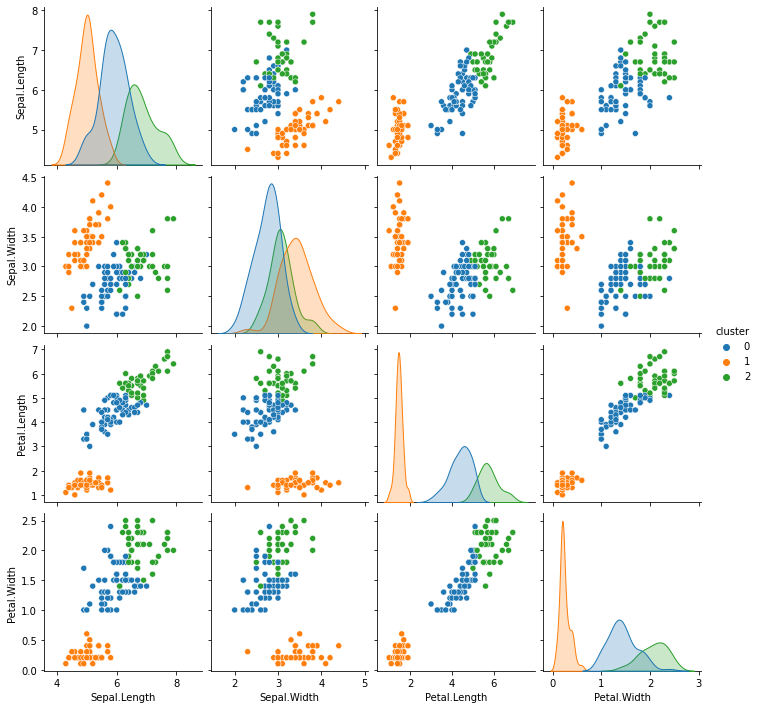

In [33]:
sns.pairplot(df_zonder_speciesnaam, hue='cluster')

In [22]:
model.inertia_

78.85144142614601

In [57]:
# Cluster centra visualiseren

In [36]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [58]:
centra_kolom_1 = model.cluster_centers_[:,:1].flatten()
centra_kolom_2 = model.cluster_centers_[:,1:2].flatten()

<AxesSubplot:>

<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

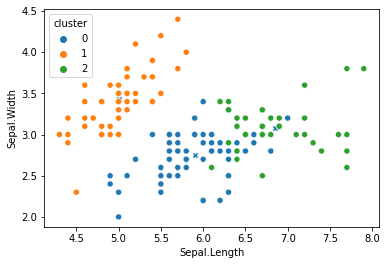

In [56]:
sns.scatterplot(x=centra_kolom_1, y=centra_kolom_2, marker='X')
sns.scatterplot(x='Sepal.Length', y='Sepal.Width', data=df_zonder_speciesnaam, hue='cluster')

Na het fitten van het kmeans algoritme willen we graag ook zien hoe goed het algoritme het doet. Hiervoor moeten we  een mapping maken tussen de resultaten van het algoritme (1,2,3,etc) en de echte waardes in de dataset (setosa, versicolor, etc). Allereerst printen we de door KMeans gevonden labels.

In [ ]:
# print hier de door de KMeans gevonden labels

Nu hebben we de gemeten waarde, en de waarde die het algoritme er aan toe kent: predicted en observed. Deze twee kunnen we tegen elkaar uitzetten in een kruistabel (crosstab) of iets geavanceerder in een z.g.h. confusion matrix:

In [59]:
pd.crosstab(df['Species'], df_zonder_speciesnaam['cluster'])

cluster,0,1,2
Species,,,
setosa,0,50,0
versicolor,48,0,2
virginica,14,0,36


**Vul dit stuk aan: wat is je conclusie op basis van deze kruistabel? Is deze in lijn met je eerder conclusie?**

## Tunen van de hoeveelheid clusters
Het aantal clusters voor K-means hebben we ingesteld op 3. Dit is voornamelijk omdat we al van tevoren weten dat er drie soorten bloemen zijn. In de praktijk is het vaak veel minder duidelijk hoeveel clusters aanwezig zijn, en is het kiezen (tunen) van het aantal clusters onderdeel van het analyse proces. Een manier om dit te doen is via de zogenaamde [Elbow-methode](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). 

Voer de K-means uit voor 1 tot en met 6 clusters en kijkt naar hoe goed het onderscheid is tussen de clusters (inertia):

In [62]:
# Fit de K-means voor 1-6 clusters en bewaar de resulterende inertia voor een plot

n_clusters = range(2,7)
inertias = []

for n in n_clusters:
    
    model = KMeans(n_clusters=n).fit(df_zonder_speciesnaam)
    
    inertias.append(model.inertia_)


Het volgende plot laat het aantal clusters versus de inertia zien:

<AxesSubplot:>

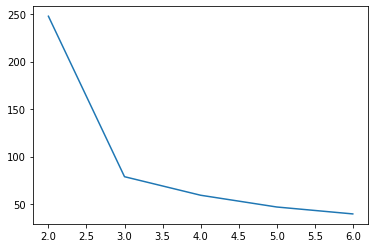

In [66]:
# Maak een elbow plot met de resultaten die je eerder berekend hebt.
sns.lineplot(x=n_clusters, y=inertias)

**Vul dit stuk aan: wat zie je in het Elbow plot? Hoeveel clusters is goed voor de Iris data? Is dit in lijn met je eerdere resultaten?**

# Evaluation
**Vul dit stuk aan: wat betekenen deze resultaten in het licht van de originele Business Understanding?**